In [1]:
import os, sys, json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pcdl 
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Analysis of a timeseries (mcdsts)

In [19]:
mcdsts = pcdl.TimeSeries(output_path = '/home/oth/BSC/MN5mount/AGS/PhysiBoSS/output', graph=True)

reading: /home/oth/BSC/MN5mount/AGS/PhysiBoSS/output/PhysiCell_settings.xml
Warning @ pyMCDS._read_setting_xml : <variable name="oxygen" ID="0"><Dirichlet_options> node missing.
Warning @ pyMCDS._read_setting_xml : <variable name="drug_X" ID="1"><Dirichlet_options> node missing.
Warning @ pyMCDS._read_setting_xml : <variable name="drug_Y" ID="2"><Dirichlet_options> node missing.
Warning @ pyMCDS._read_setting_xml : <cell_definition name="default" ID="0"><phenotype><cycle><phase_durations> node missing.
Warning @ pyMCDS._read_setting_xml : <cell_definition name="default" ID="0"><phenotype><motility><options><advanced_chemotaxis> node missing.
Warning @ pyMCDS._read_setting_xml : cell_definition custom_data without variable type setting detected. ['K_half_apoptosis', 'K_half_growth', 'apoptosis_rate_basal', 'basal_growth_rate', 'drug_X_Hill_coeff', 'drug_X_half_max', 'drug_X_permeability', 'drug_Y_Hill_coeff', 'drug_Y_half_max', 'drug_Y_permeability', 'hill_coeff_apoptosis', 'hill_coeff_

In [7]:
# mcdsts.plot_scatter()  # jpeg images colored by cell_type
mcdsts.plot_contour(focus='drug_X') # jpeg images colored by oxygen values

px figure size set to [1200, 1284].
min max extrema set to [0.0, 1.0].
xlim set to (-600.0, 600.0).
ylim set to (-600.0, 600.0).


'/home/oth/BSC/MN5mount/AGS/PhysiBoSS/output/conc_drug_X_z0.0/'

In [20]:
lr_time = [mcds.get_time() for mcds in mcdsts.get_mcds_list()]
list_of_relevant_vars = list()
relevant_columns = ["time", "drug_X_external_density", "drug_X_internal_density", "drug_Y_external_density", "drug_Y_internal_density"]
all_data = pd.DataFrame()

for mcds in mcdsts.get_mcds_list():
    full_df = mcds.get_cell_df()
    # print([col for col in full_df.columns if col in relevant_columns])
    frame_df = mcds.get_cell_df()
    frame_df.reset_index(inplace=True)
    list_of_relevant_vars.append(frame_df)

all_data = pd.concat(list_of_relevant_vars, ignore_index=True) 

In [21]:
print(all_data.columns.tolist())
all_data.to_csv("total_info_sim.csv", header=True, index=False)


['ID', 'K_half_apoptosis', 'K_half_growth', 'activation_threshold', 'akt_node', 'anti_akt_node', 'anti_mek_node', 'anti_pi3k_node', 'anti_tak1_node', 'apoptosis_rate_basal', 'attachment_elastic_constant', 'attachment_rate', 'basal_growth_rate', 'calcification_rate', 'calcified_fraction', 'cell_BM_adhesion_strength', 'cell_BM_repulsion_strength', 'cell_cell_adhesion_strength', 'cell_cell_repulsion_strength', 'cell_count_voxel', 'cell_density_micron3', 'cell_type', 'chemotaxis_direction', 'chemotaxis_index', 'contact_with_basement_membrane', 'current_cycle_phase_exit_rate', 'current_death_model', 'current_phase', 'cycle_model', 'cytoplasmic_biomass_change_rate', 'cytoplasmic_volume', 'damage', 'damage_rate', 'dead', 'dead_phagocytosis_rate', 'death_rates_0', 'death_rates_1', 'default_attack_rates', 'default_cell_adhesion_affinities', 'default_fusion_rates', 'default_live_phagocytosis_rates', 'default_transformation_rates', 'detachment_rate', 'drug_X', 'drug_X_Hill_coeff', 'drug_X_chemota

<Axes: xlabel='time', ylabel='value'>

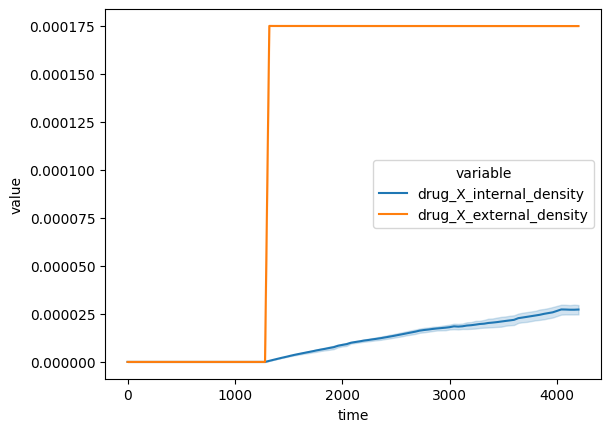

In [22]:
densities_table_drug_X = all_data[["time", "drug_X_internal_density", "drug_X_external_density"]]
dfl = pd.melt(densities_table_drug_X, ['time'])
sns.lineplot(data=dfl, x='time', y='value', hue='variable')

<Axes: xlabel='time', ylabel='value'>

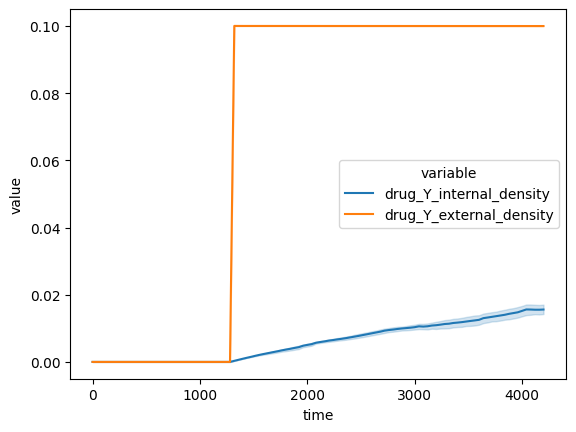

In [23]:
densities_table_drug_Y = all_data[["time", "drug_Y_internal_density", "drug_Y_external_density"]]
dfl2 = pd.melt(densities_table_drug_Y, ['time'])
sns.lineplot(data=dfl2, x='time', y='value', hue='variable')

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import widgets

df = all_data

# Function to update the scatter plot based on slider value
def update_scatter(z_multiplier):
    fig = go.Figure(data=[go.Scatter3d(
        x=df['position_x'],
        y=df['position_y'],
        z=df['time'] * z_multiplier,
        mode='markers',
        marker=dict(size=2, color=df['drug_X_internal_density'], colorscale='plasma'),
        text=df['ID']
    )])
    
    fig.update_layout(
        title=f'Interactive 3D Scatter Plot (Z scaled by {z_multiplier})',
        scene=dict(
            xaxis_title='pos X',
            yaxis_title='pos Y',
            zaxis_title='time'
        )
    )
    fig.show()

# Create a slider widget
slider = widgets.FloatSlider(
    value=0.0,
    min=0.0,
    max=4200.0,
    step=40,
    description='Z scale:'
)

# Display the interactive plot with slider
widgets.interact(update_scatter, z_multiplier=slider)

interactive(children=(FloatSlider(value=0.0, description='Z scale:', max=4200.0, step=40.0), Output()), _dom_c…

<function __main__.update_scatter(z_multiplier)>

## Analysis of a single frame (mcds)

In [23]:
mcds = pcdl.TimeStep(xmlfile = "/home/oth/BSC/MN5mount/AGS/PhysiBoSS/output/output00000033.xml",graph=True)

reading: /home/oth/BSC/MN5mount/AGS/PhysiBoSS/output/PhysiCell_settings.xml
Warning @ pyMCDS._read_setting_xml : <variable name="oxygen" ID="0"><Dirichlet_options> node missing.
Warning @ pyMCDS._read_setting_xml : <variable name="drug_X" ID="1"><Dirichlet_options> node missing.
Warning @ pyMCDS._read_setting_xml : <variable name="drug_Y" ID="2"><Dirichlet_options> node missing.
Warning @ pyMCDS._read_setting_xml : <cell_definition name="default" ID="0"><phenotype><cycle><phase_durations> node missing.
Warning @ pyMCDS._read_setting_xml : <cell_definition name="default" ID="0"><phenotype><motility><options><advanced_chemotaxis> node missing.
Warning @ pyMCDS._read_setting_xml : cell_definition custom_data without variable type setting detected. ['K_half_apoptosis', 'K_half_growth', 'apoptosis_rate_basal', 'basal_growth_rate', 'drug_X_Hill_coeff', 'drug_X_half_max', 'drug_X_permeability', 'drug_Y_Hill_coeff', 'drug_Y_half_max', 'drug_Y_permeability', 'hill_coeff_apoptosis', 'hill_coeff_

In [24]:
# all concentration values at a particular coordinate
mcds.get_concentration_at(x=0, y=0, z=0)  # array([34.4166271])
mcds.get_concentration_at(x=111, y=22, z=-5)  # array([18.80652216])
mcds.get_concentration_at(x=111, y=22, z=-5.1)  # None and Warning @ pyMCDS.is_in_mesh : z = -5.1 out of bounds: z-range is (-5.0, 5.0)

# concentration meshgrid for a particular substrate
oxygen_3d = mcds.get_concentration('drug_X')
oxygen_2d = mcds.get_concentration('drug_Y', z_slice=0)
oxygen_3d.shape  # (11, 11, 1)
oxygen_2d.shape  # (11, 11)

# contour plot
# fig = mcds.plot_contour('drug_Y')
# fig = mcds.plot_contour('drug_Y', z_slice=3.333)
# fig.show()ahh


pyMCD.get_concentration_at(x=0,y=0,z=0) | jkl: [30,30,0] | substrate: drug_X 0.00017499995737341035
pyMCD.get_concentration_at(x=0,y=0,z=0) | jkl: [30,30,0] | substrate: drug_Y 0.09999997564194878
pyMCD.get_concentration_at(x=0,y=0,z=0) | jkl: [30,30,0] | substrate: oxygen 7.737876189329871
pyMCD.get_concentration_at(x=111,y=22,z=-5) | jkl: [35,31,0] | substrate: drug_X 0.00017499991474682064
pyMCD.get_concentration_at(x=111,y=22,z=-5) | jkl: [35,31,0] | substrate: drug_Y 0.09999995128389752
pyMCD.get_concentration_at(x=111,y=22,z=-5) | jkl: [35,31,0] | substrate: oxygen 8.722710577157251
pyMCD.get_concentration_at(x=111,y=22,z=-5.1) | jkl: [35,31,0] | substrate: drug_X 0.00017499991474682064
pyMCD.get_concentration_at(x=111,y=22,z=-5.1) | jkl: [35,31,0] | substrate: drug_Y 0.09999995128389752
pyMCD.get_concentration_at(x=111,y=22,z=-5.1) | jkl: [35,31,0] | substrate: oxygen 8.722710577157251


(60, 60)

categories found: {'default'}.
min max extrema set to: [None, None].
xlim set to: (-600.0, 600.0).
ylim set to: (-600.0, 600.0).


/tmp/ipykernel_6370/1649924745.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_6370/1649924745.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


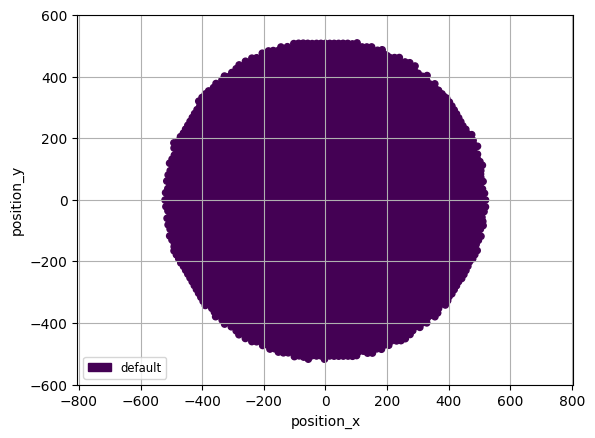

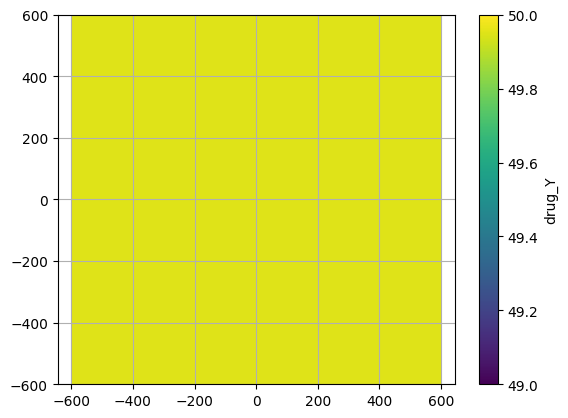

In [45]:
# scatter plot
fig = mcds.plot_scatter()  # default focus is cell_type and z_slice=0
fig.show()

fig = mcds.plot_contour('drug_Y')
fig.show()

In [47]:
# data from all agents in the domain
df = mcds.get_cell_df()
df.shape  # (992, 94)  this means: 992 agents in the whole domain, 94 tracked variables
df.info()
df.head()

# data variables that are in all agents the same carry no information
# let's filter for variables that carry at least 2 states
df = mcds.get_cell_df()
df.shape # (992, 38) this means: 992 agents in the whole domain, 38 tracked variables have more than 2 states

# data from all agents in the xyz specified voxel
df = mcds.get_cell_df_at(x=0,y=0,z=0)
df.shape  # (4, 94)

df = mcds.get_cell_df_at(x=111,y=22,z=-5)
df.shape  # (3, 94)

df = mcds.get_cell_df_at(x=111,y=22,z=-5.1)  # None and Warning @ pyMCDS.is_in_mesh : z = -5.1 out of bounds: z-range is (-5.0, 5.0)

<class 'pandas.core.frame.DataFrame'>
Index: 5032 entries, 0 to 5032
Columns: 165 entries, K_half_apoptosis to xmlfile
dtypes: bool(3), float64(138), int64(7), object(17)
memory usage: 6.3+ MB


categories found: {'default'}.
min max extrema set to: [None, None].
xlim set to: (-600.0, 600.0).
ylim set to: (-600.0, 600.0).
z_slice set to 0.0.


/tmp/ipykernel_6370/640602622.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


categories found: None.
min max extrema set to: [49.949989225382055, 49.950037475015634].
xlim set to: (-600.0, 600.0).
ylim set to: (-600.0, 600.0).


/tmp/ipykernel_6370/640602622.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


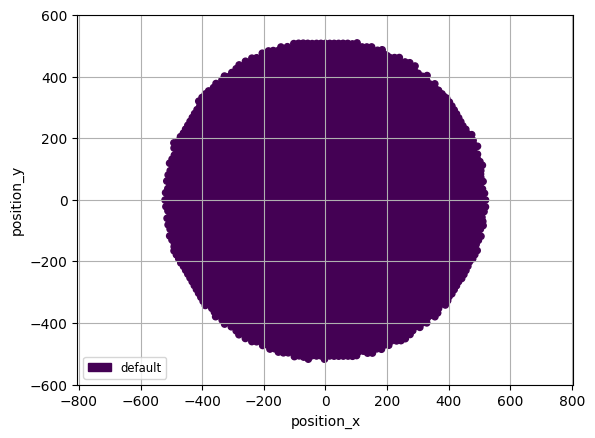

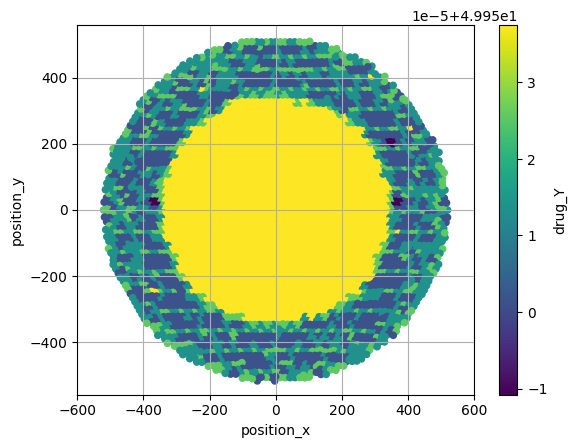

In [52]:
# scatter plot
fig = mcds.plot_scatter()  # default focus is cell_type and z_slice=0
fig.show()

fig = mcds.plot_scatter('drug_Y', z_slice=3.333)
fig.show()

In [23]:
# attached graph
graph = mcds.get_attached_graph_dict()
len(graph)  # 992

# neighbor graph
graph = mcds.get_neighbor_graph_dict()
len(graph)  # 992
graph.keys()  # dict_keys([0, 1, ..., 993])
graph[0]  # {1, 31, 33, 929, 935, 950}

print(graph.keys(), graph[0])

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,